In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'E:\My_Portfolio_Projects\ML Models\Loan_prediction_model\lending_club_loan_two.csv', encoding='utf-8') 

In [4]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"


Processing column: emp_title
Processing column: home_ownership
Processing column: application_type


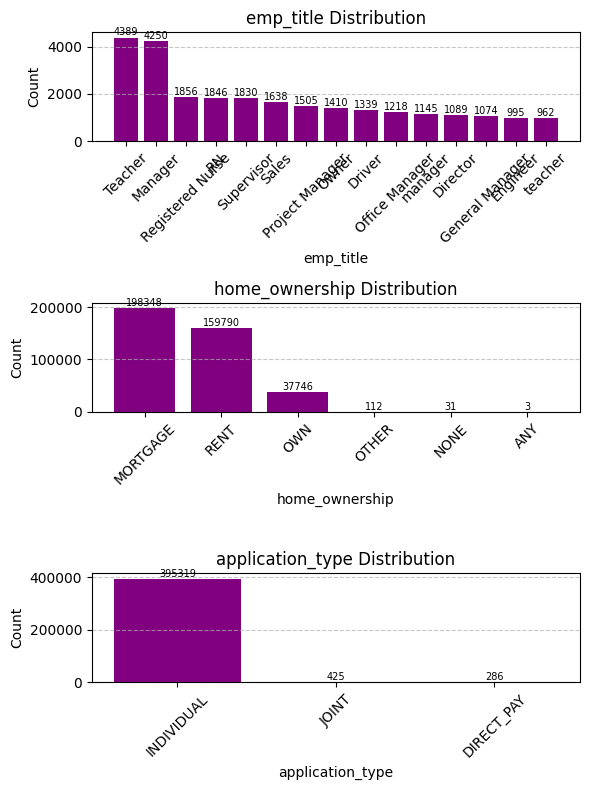

In [10]:
import matplotlib.pyplot as plt

# List of columns to plot
bars_count = ['emp_title', 'home_ownership', 'application_type']

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 8))

# Loop through each column and create bar plots
for i, col in enumerate(bars_count):
    print(f"Processing column: {col}")  # Debugging: Print the current column being processed
    
    # Get value counts for the column and limit to top 10 categories
    value_counts = df[col].value_counts().head(15)  # Limit to top 10 categories to avoid clutter
    
    # Create a bar plot for the current subplot
    axes[i].bar(value_counts.index.astype(str), value_counts.values, color='purple')
    
    # Set the title and axis labels for the subplot
    axes[i].set_title(f'{col} Distribution')  # Set title
    axes[i].set_xlabel(col)  # Set x-axis label
    axes[i].set_ylabel('Count')  # Set y-axis label
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on top of each bar
    for bar in axes[i].patches:
        height = bar.get_height()
        x_coord = bar.get_x() + bar.get_width() / 2
        axes[i].text(x_coord, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=7, color='black')
    
    # Add grid lines for better readability
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

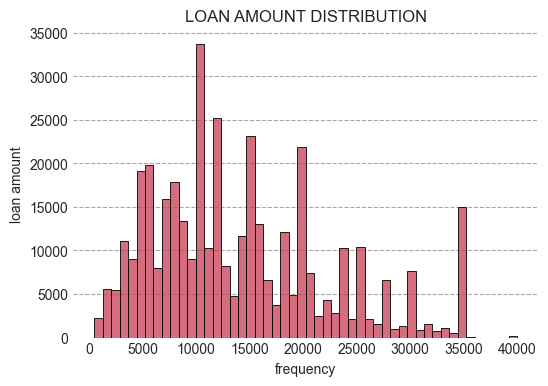

In [11]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(6,4))
sns.histplot(data = df   , x = df['loan_amnt'] , color = '#C63C51' , bins = 50  ) 
plt.title('LOAN AMOUNT DISTRIBUTION')
plt.xlabel('frequency')
plt.ylabel('loan amount')
plt.grid(linestyle = '--' , alpha = 0.7 , color = 'grey' , axis = 'y' )
plt.gca().set_facecolor('WHITE')
plt.show()


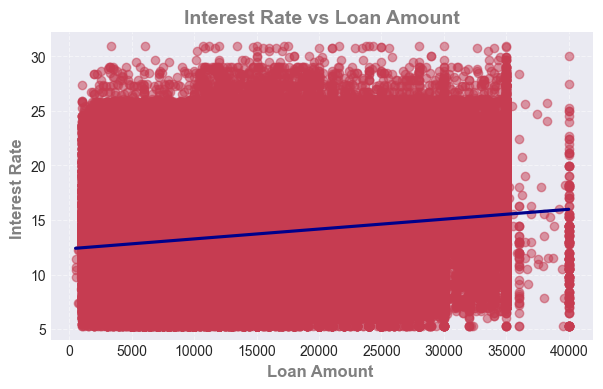

In [13]:
plt.figure(figsize=(7, 4))

sns.regplot(x="loan_amnt", y="int_rate", data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'darkblue'} ,color= '#C63C51')

plt.title("Interest Rate vs Loan Amount", fontsize=14, fontweight='bold', color='grey')
plt.xlabel("Loan Amount ", fontsize=12, fontweight='bold', color='grey')
plt.ylabel("Interest Rate ", fontsize=12, fontweight='bold', color='grey')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


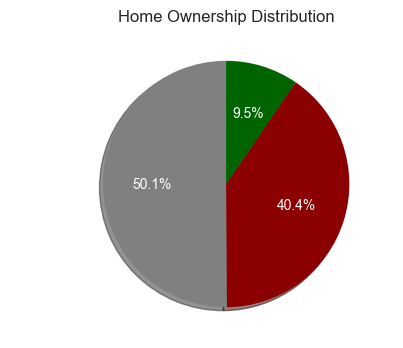

In [14]:
home_ownership_counts = df['home_ownership'].value_counts()

home_ownership_counts = home_ownership_counts[home_ownership_counts / home_ownership_counts.sum() > 0.01 ]
def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 1 else ''

plt.figure(figsize=(6,4))
plt.pie(home_ownership_counts , labels = home_ownership_counts.index , autopct= autopct_format , colors = ['grey' ,'darkred' ,'darkgreen'] , startangle= 90 , 
            shadow = True ,  textprops={'color': 'white', 'fontsize': 10, 'fontweight': 'light'}) 
plt.title("Home Ownership Distribution")
plt.show()

In [ ]:
df.head(1)

In [ ]:
# Define columns to check for outliers
outlier_check = ['installment', 'loan_amnt', 'total_acc']

num_plots = len(outlier_check)  # Total number of plots
rows = int(np.ceil(num_plots / 3))  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))  # Adjust figure size
axes = axes.flatten()  # Flatten axes array for easy iteration

# Loop through each column and plot a Seaborn boxplot
for i, col in enumerate(outlier_check):
    sns.violinplot(x=df[col], ax=axes[i], color='#C63C51')  # Use Seaborn's boxplot
    axes[i].set_title(f"{col} Distribution", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)

# Hide empty subplots if total columns < full grid space
for j in range(i + 1, len(axes)):  
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()